# Exploratory analysis of the wine tasting dataset
Will try to identify the principal independent variables in this dataset to predict grades.

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [364]:
df_wine = pd.read_csv('data/winemag-data-130k-v2-sentiment-stem.csv', index_col='Unnamed: 0')
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,creami,licoric,bodi,bit,dens,long,still,merlot,power,orang
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,...,0,0,0,0,0,0,1,0,0,0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,...,0,0,0,1,0,0,0,0,0,1
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,...,0,0,0,0,0,0,0,0,0,0
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,...,0,0,0,0,0,0,1,0,1,0


In [365]:
df_wine.describe()

,points,price,polarity_text,subjectivity_text,wine,flavor,fruit,aroma,finish,acid,...,creami,licoric,bodi,bit,dens,long,still,merlot,power,orang
count,129971.000000,120975.000000,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000,...,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000,129971.000000
mean,88.447138,35.363389,0.156991,0.496492,0.507513,0.499773,0.398704,0.311308,0.308115,0.293173,...,0.045072,0.045487,0.045249,0.043871,0.044318,0.044218,0.042440,0.043733,0.042925,0.042179
std,3.039730,41.022218,0.170302,0.151836,0.499945,0.500002,0.489634,0.463030,0.461716,0.455219,...,0.207462,0.208371,0.207850,0.204810,0.205801,0.205579,0.201592,0.204501,0.202689,0.200997
min,80.000000,4.000000,-0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,17.000000,0.042857,0.401886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88.000000,25.000000,0.154167,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91.000000,42.000000,0.266667,0.593788,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,3300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [366]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Columns: 116 entries, country to orang
dtypes: float64(3), int64(101), object(12)
memory usage: 116.0+ MB


There is a pattern between price and points but no clear correlation.
We should investigate further.

In [367]:
top_variety = df_wine['variety'].value_counts()
top_variety.head(20)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Sangiovese                   2707
Malbec                       2652
Portuguese Red               2466
White Blend                  2360
Sparkling Blend              2153
Tempranillo                  1810
Rhône-style Red Blend        1471
Pinot Gris                   1455
Name: variety, dtype: int64

In [368]:
#keep only the top 20 varieties
df_wine = df_wine[df_wine['variety'].isin(top_variety.index[:20])]
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,creami,licoric,bodi,bit,dens,long,still,merlot,power,orang
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,...,0,0,0,0,0,0,1,0,0,0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,...,0,0,0,1,0,0,0,0,0,1
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0


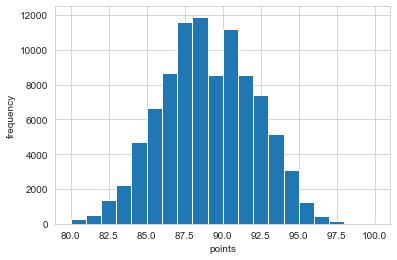

In [369]:
#plot the distribution of the points
plt.hist(df_wine['points'],bins=20)
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

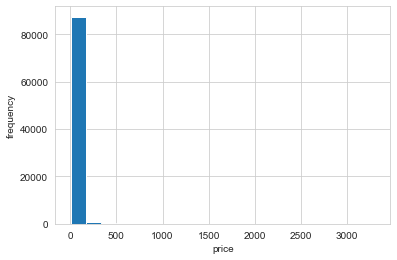

In [370]:
#plot the distribution of the price
plt.hist(df_wine['price'],bins=20)
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

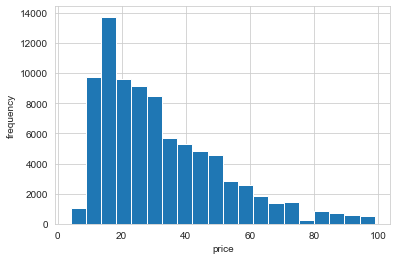

In [371]:
#take only the prices under $100
df_wine = df_wine[df_wine['price']<100]
plt.hist(df_wine['price'],bins=20)
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

In [372]:
df_wine['country'].value_counts()

US                44673
France            11928
Italy              8611
Chile              3489
Spain              3263
Argentina          2988
Portugal           2518
Germany            1774
New Zealand        1334
Australia          1191
Austria             984
South Africa        825
Israel              369
Greece              188
Canada              174
Bulgaria            114
Romania              87
England              69
Mexico               51
Slovenia             46
Hungary              45
Moldova              39
Uruguay              38
Turkey               37
Lebanon              33
Brazil               28
Morocco              23
Georgia              17
Croatia              14
Ukraine              12
Peru                 12
Cyprus                8
Serbia                6
Macedonia             6
Luxembourg            5
Czech Republic        5
India                 2
Switzerland           2
Slovakia              1
Armenia               1
Name: country, dtype: int64

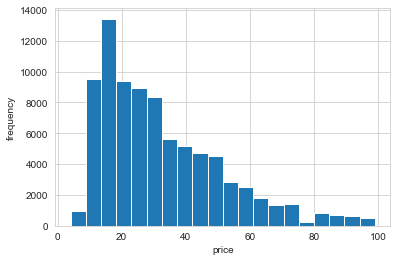

In [373]:
#keep countries with more than 500 wines
df_wine = df_wine[df_wine['country'].isin(df_wine['country'].value_counts()[df_wine['country'].value_counts()>500].index)]

plt.hist(df_wine['price'],bins=20)
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

In [374]:
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,creami,licoric,bodi,bit,dens,long,still,merlot,power,orang
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,...,0,0,0,0,0,0,1,0,0,0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,...,0,0,0,1,0,0,0,0,0,1
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129960,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,48.0,Douro,NaN,NaN,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,...,0,0,0,0,0,0,0,0,0,0
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0


In [375]:
#Extract the year from the title column
df_wine['year'] = df_wine['title'].str.extract('(\d{4})',expand=False)
df_wine.dropna(subset=['year'],inplace=True)
df_wine['year'] = df_wine['year'].astype(int)

#keep only the years between 1970 and 2022
df_wine = df_wine[df_wine['year']>1970]
df_wine = df_wine[df_wine['year']<2022]

df_wine['year'].describe()

count    81477.000000
mean      2010.732759
std          3.544242
min       1985.000000
25%       2009.000000
50%       2011.000000
75%       2013.000000
max       2017.000000
Name: year, dtype: float64

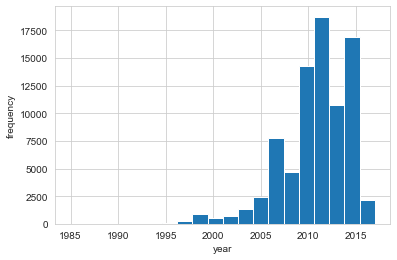

In [376]:
#plot the distribution of the year
plt.hist(df_wine['year'],bins=20)
plt.xlabel('year')
plt.ylabel('frequency')
plt.show()

<AxesSubplot:>

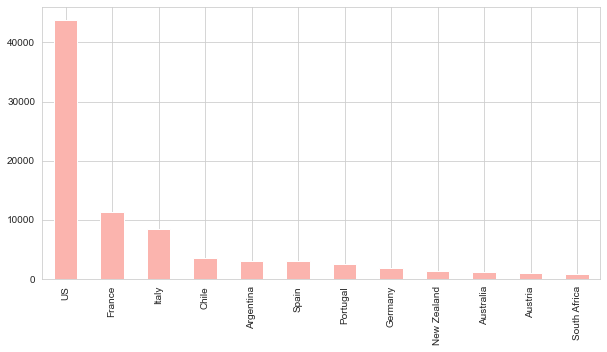

In [377]:
#count the number of wines per country
df_country = df_wine['country'].value_counts()
df_country.plot(kind='bar',figsize=(10,5),cmap='Pastel1')

In [ ]:
#create dummy variables for the country
df_wine = pd.get_dummies(df_wine,columns=['country'])
#create dummy variables for the variety
df_wine = pd.get_dummies(df_wine,columns=['variety'])

df_wine.info()